In [2]:
using TestImages
using Images, ImageView


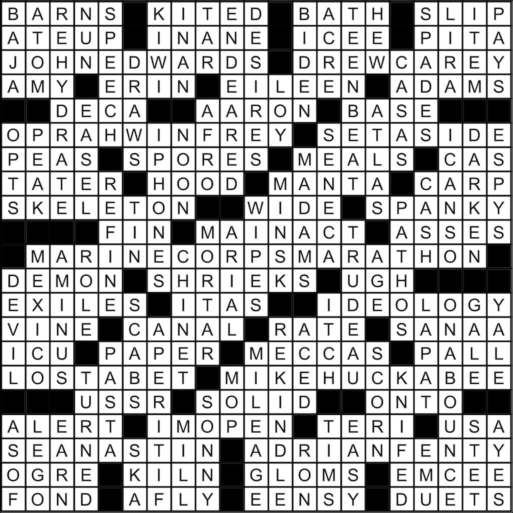

In [3]:
using FileIO
img = load("WashingtonianOctober2019SOL-copy.jpg")

In [4]:
height, width = size(img)

(1024, 1024)

In [5]:
using Colors, Images

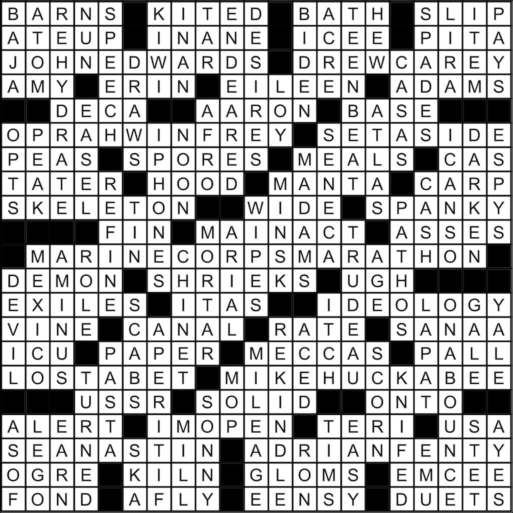

In [7]:
imgg = Gray.(img)

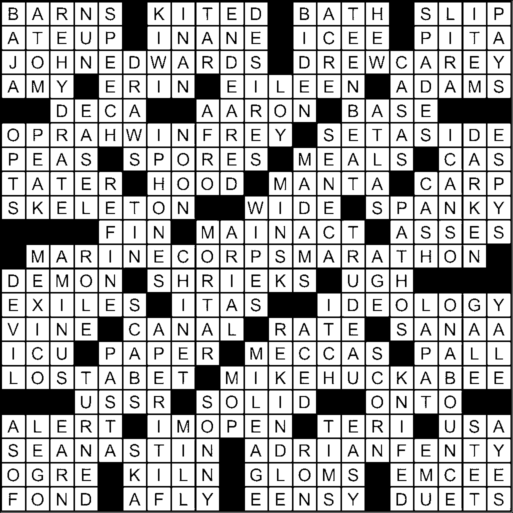

In [8]:
using ImageBinarization
alg = Otsu()
bin_img = binarize(imgg, alg)

In [13]:
bin_img[1020, :]

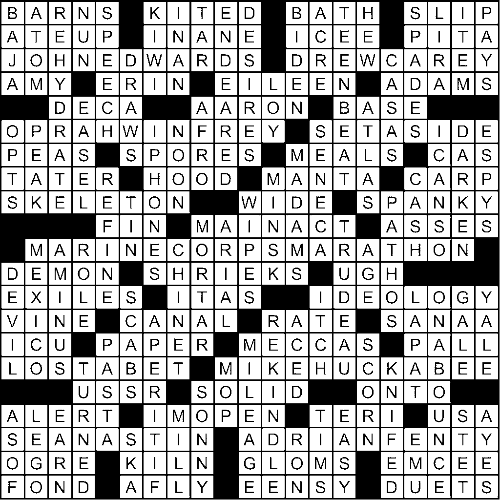

In [18]:
imresize(bin_img, 500, 500)

In [9]:
using DataStructures
cnt = counter(Int)

Accumulator{Int64,Int64} with 0 entries

In [19]:
for i in 1:height
    seq_white = 0
    for j in 1:width
        if img[i,j].r >= 0.5
            seq_white += 1
        else
            if seq_white != 0
                inc!(cnt, seq_white)
            end
            seq_white = 0
        end
    end
    if seq_white != 0
        inc!(cnt, seq_white)
    end
end

In [10]:
arr = Int8.(bin_img)

sum1 = vec(sum(arr, dims=1))
sum2 = vec(sum(arr, dims=2))



function get_break_index(sum_arr)
    flag = [e > 10 for e in sum_arr]
    e = similar(flag)
    e[1: length(e)-1] = flag[2: length(e)]
    f = e - flag
    return findall(x -> x == 1, f)
end

get_break_index (generic function with 1 method)

In [11]:
idx2 = get_break_index(sum1)
idx1 = get_break_index(sum2)

22-element Array{Int64,1}:
    4
   52
  101
  149
  198
  246
  295
  343
  392
  440
  489
  538
  586
  635
  683
  732
  780
  829
  877
  926
  974
 1023

In [16]:
for i in 1:length(idx1)-1
    for j in 1:length(idx2)-1
        begin1, end1 = idx2[i] + 3, idx2[i+1] - 3
        begin2, end2 = idx1[j] + 3, idx1[j+1] - 3
        save("$i-$j.jpg", bin_img[begin1: end1, begin2: end2])
    end
end

In [13]:
typeof(bin_img[10: 70, 10: 70])

Array{Gray{Normed{UInt8,8}},2}